In [1]:
# load the data
import pandas as pd
import os

DATA_PATH = os.path.join("datasets", "memes")

def load_meme_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "memes.csv")
    return pd.read_csv(csv_path)

In [2]:
memes = load_meme_data()
memes.head()

,name,number_words,number_images,spelling_mistakes,reuse_potential,classification,number_manager,number_reactions,number_viewed,image
0,0.jpg,23,2,False,1,2,0,3,3,harold
1,1.png,22,4,False,1,1,0,1,3,carl
2,2.jpg,10,2,False,0,1,0,3,3,thor
3,3.png,10,1,False,1,1,0,0,3,boss
4,4.jpg,4,1,False,1,2,0,3,5,desaster_girl


In [3]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               181 non-null    object
 1   number_words       181 non-null    int64 
 2   number_images      181 non-null    int64 
 3   spelling_mistakes  181 non-null    bool  
 4   reuse_potential    181 non-null    int64 
 5   classification     181 non-null    int64 
 6   number_manager     181 non-null    int64 
 7   number_reactions   181 non-null    int64 
 8   number_viewed      181 non-null    int64 
 9   image              181 non-null    object
dtypes: bool(1), int64(7), object(2)
memory usage: 13.0+ KB


In [4]:
memes["classification"].value_counts()

2    72
1    68
0    23
3    18
Name: classification, dtype: int64

In [5]:
memes.describe()

,number_words,number_images,reuse_potential,classification,number_manager,number_reactions,number_viewed
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,10.458564,1.563536,1.016575,1.469613,0.513812,4.353591,7.497238
std,7.047828,0.944338,0.799132,0.840248,0.904358,5.544452,6.732693
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
50%,9.000000,1.000000,1.000000,1.000000,0.000000,3.000000,6.000000
75%,14.000000,2.000000,2.000000,2.000000,1.000000,6.000000,10.000000
max,59.000000,6.000000,2.000000,3.000000,5.000000,42.000000,35.000000


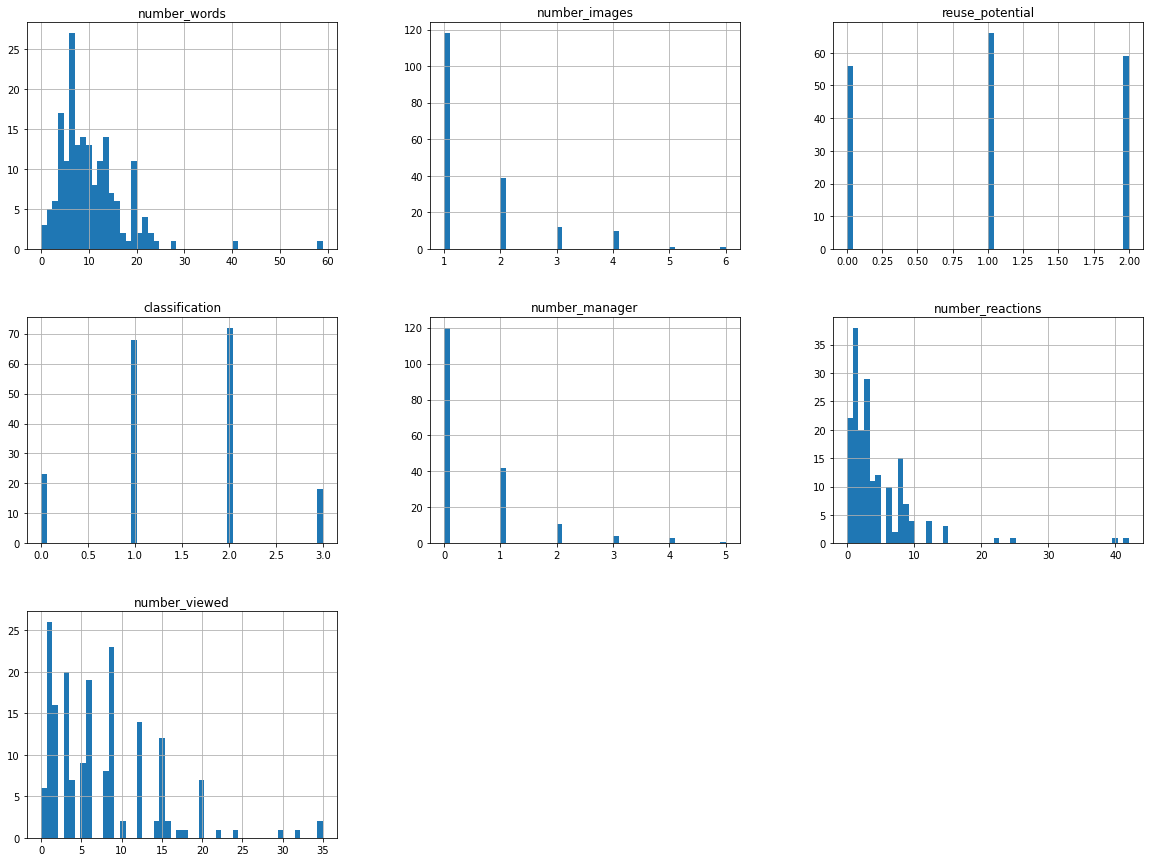

In [6]:
import matplotlib.pyplot as plt
memes.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Encode boolean values
memes["spelling_mistakes"].replace({True: 1, False: 0}, inplace=True)

In [8]:
## Correlation observation
corr_matrix = memes.corr()
corr_matrix["classification"].sort_values(ascending=False)

classification       1.000000
number_reactions     0.574723
number_viewed        0.400414
number_manager       0.346003
reuse_potential      0.327567
number_images        0.154730
spelling_mistakes   -0.059241
number_words        -0.231698
Name: classification, dtype: float64

array([[<AxesSubplot:xlabel='classification', ylabel='classification'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='classification'>,
        <AxesSubplot:xlabel='number_viewed', ylabel='classification'>,
        <AxesSubplot:xlabel='number_manager', ylabel='classification'>,
        <AxesSubplot:xlabel='reuse_potential', ylabel='classification'>,
        <AxesSubplot:xlabel='number_images', ylabel='classification'>,
        <AxesSubplot:xlabel='spelling_mistakes', ylabel='classification'>,
        <AxesSubplot:xlabel='number_words', ylabel='classification'>],
       [<AxesSubplot:xlabel='classification', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_viewed', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_manager', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='reuse_potential', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_images', ylab

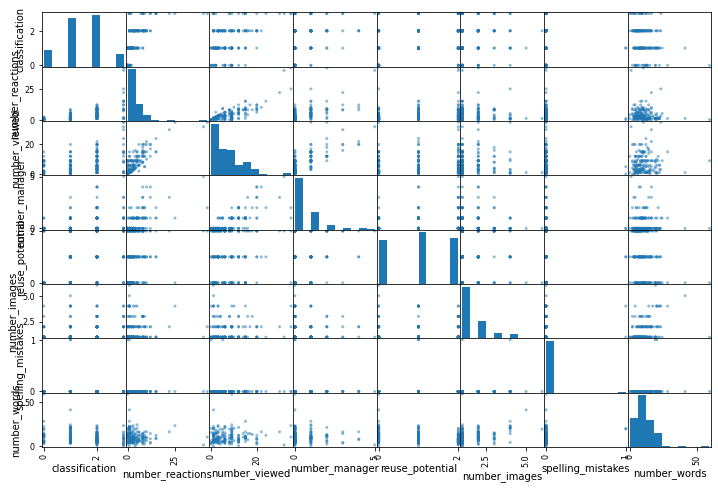

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["classification", "number_reactions", 
              "number_viewed", "number_manager", 
              "reuse_potential", "number_images",
              "spelling_mistakes", "number_words"]
scatter_matrix(memes[attributes], figsize=(12,8))

array([[<AxesSubplot:xlabel='classification', ylabel='classification'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='classification'>,
        <AxesSubplot:xlabel='number_viewed', ylabel='classification'>,
        <AxesSubplot:xlabel='number_manager', ylabel='classification'>,
        <AxesSubplot:xlabel='number_images', ylabel='classification'>,
        <AxesSubplot:xlabel='number_words', ylabel='classification'>],
       [<AxesSubplot:xlabel='classification', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_viewed', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_manager', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_images', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_words', ylabel='number_reactions'>],
       [<AxesSubplot:xlabel='classification', ylabel='number_viewed'>,
        <AxesSubplot:xlabel='number_reactions', ylabel=

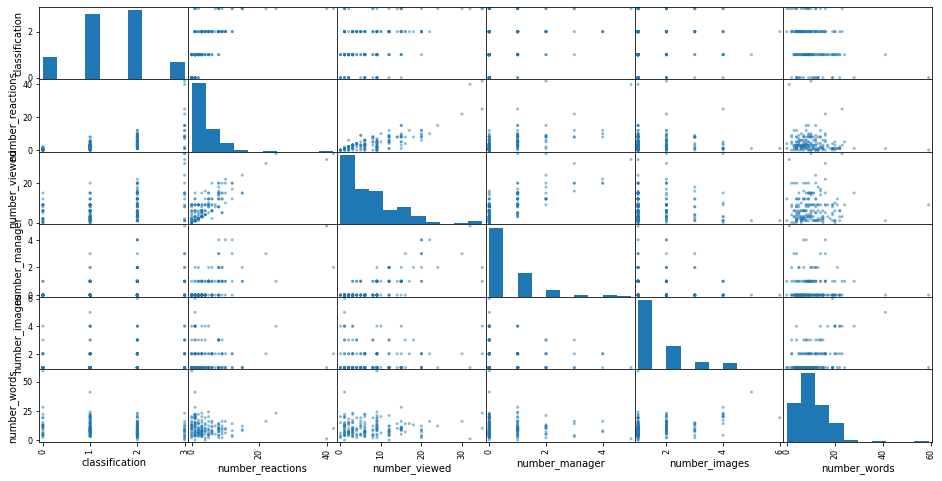

In [10]:
# filtered a little bit

attributes = ["classification", "number_reactions", 
              "number_viewed", "number_manager", 
              "number_images",
              "number_words"]
scatter_matrix(memes[attributes], figsize=(16,8))

In [11]:
import numpy as np
# create new attribute Heikelkeitsfaktor
# ratio of manager to people multiplied with exp(num_manager)
def get_heikelkeit(num_people, num_manager):
    if num_people == 0:
        return 0
    else:
        return np.exp(num_manager/num_people)

for idx, meme in memes.iterrows():
    memes.at[idx, "heikelkeitsfaktor"] = get_heikelkeit(meme["number_viewed"], meme["number_manager"])

In [12]:
# text to picture ratio -> laberfaktor
# I claim that many words per picture is worse than less words
def get_laberfaktor(num_pictures, num_words):
    if num_words == 0:
        return 1
    else:
        return num_pictures / num_words

for idx, meme in memes.iterrows():
    memes.at[idx, "laberfaktor"] = get_laberfaktor(meme["number_images"], meme["number_words"])

array([[<AxesSubplot:xlabel='classification', ylabel='classification'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='classification'>,
        <AxesSubplot:xlabel='heikelkeitsfaktor', ylabel='classification'>,
        <AxesSubplot:xlabel='laberfaktor', ylabel='classification'>],
       [<AxesSubplot:xlabel='classification', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='heikelkeitsfaktor', ylabel='number_reactions'>,
        <AxesSubplot:xlabel='laberfaktor', ylabel='number_reactions'>],
       [<AxesSubplot:xlabel='classification', ylabel='heikelkeitsfaktor'>,
        <AxesSubplot:xlabel='number_reactions', ylabel='heikelkeitsfaktor'>,
        <AxesSubplot:xlabel='heikelkeitsfaktor', ylabel='heikelkeitsfaktor'>,
        <AxesSubplot:xlabel='laberfaktor', ylabel='heikelkeitsfaktor'>],
       [<AxesSubplot:xlabel='classification', ylabel='laberfaktor'>,
        <AxesSubplot:xlabel='number_re

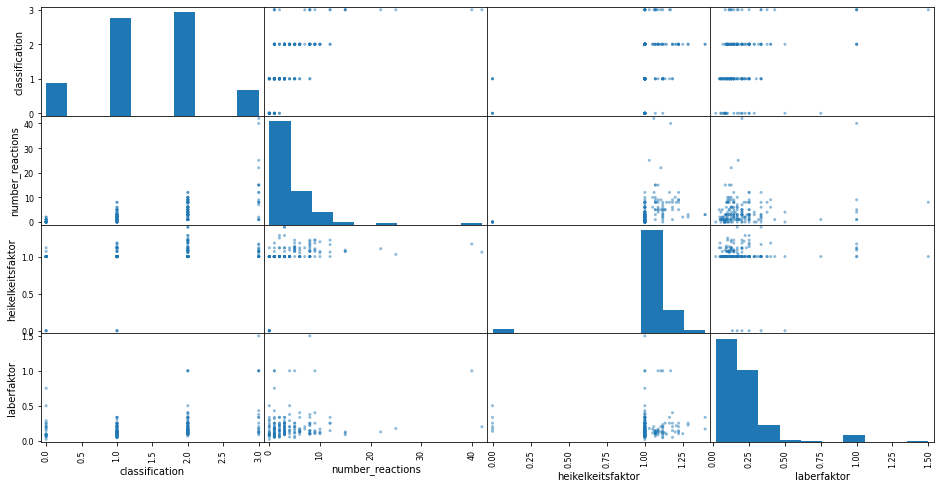

In [13]:
# filtered a little bit more with heikelkeitsfaktor

attributes = ["classification", "number_reactions", 
              "heikelkeitsfaktor", 
              "laberfaktor"]
scatter_matrix(memes[attributes], figsize=(16,8))

In [14]:
## creating a testset (putting 20% of the data aside)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(memes, test_size=0.2, random_state=42)

## Prepare for machine learning algorithm
memes_prepared = train_set[attributes].copy() # get only "number_reactions", "heikelkeitsfactor" and "laberfaktor"
memes_prepared = train_set.drop("classification", axis=1)
memes_prepared_labels = train_set["classification"].copy()

In [15]:
memes_prepared = memes_prepared.drop("image", axis=1)
memes_prepared = memes_prepared.drop("name", axis=1)


In [16]:
# select and train model
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(random_state=43)
sgd_clf.fit(memes_prepared, memes_prepared_labels)

SGDClassifier(random_state=43)

In [17]:
from sklearn.metrics import mean_squared_error
X_test = test_set.drop(["image", "name", "classification"], axis=1)
y_test_image = test_set["image"].copy()
y_test = test_set["classification"].copy()

y_hat = sgd_clf.predict(X_test)

final_mse = mean_squared_error(y_test.to_numpy(), y_hat)
final_rmse = np.sqrt(final_mse)
final_rmse

0.9299811099505543

In [18]:
X_test.head(1)

,number_words,number_images,spelling_mistakes,reuse_potential,number_manager,number_reactions,number_viewed,heikelkeitsfaktor,laberfaktor
19,13,3,0,2,2,8,18,1.117519,0.230769


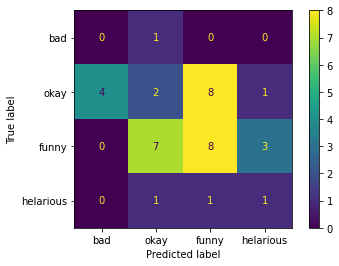

In [19]:
# Confusion matrix and analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(["bad", "okay", "funny", "helarious"])).plot()

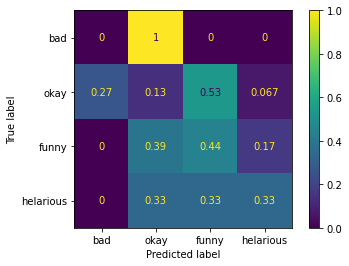

In [20]:
# normalized
cm = confusion_matrix(y_test, y_hat, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(["bad", "okay", "funny", "helarious"])).plot()

In [21]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestClassifier()
forest_reg.fit(memes_prepared, memes_prepared_labels.to_numpy())

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, return_train_score=True, scoring='f1_macro')
grid_search.fit(memes_prepared, memes_prepared_labels.to_numpy())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1_macro')

In [22]:
final_model = grid_search.best_estimator_

y_hat = final_model.predict(X_test)

final_mse = mean_squared_error(y_test.to_numpy(), y_hat)
final_rmse = np.sqrt(final_mse)
final_rmse

0.7710996009560598

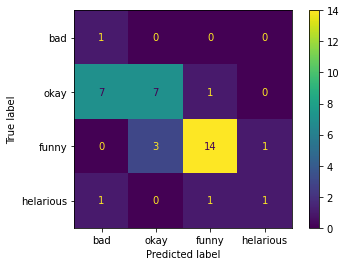

In [23]:
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(["bad", "okay", "funny", "helarious"])).plot()

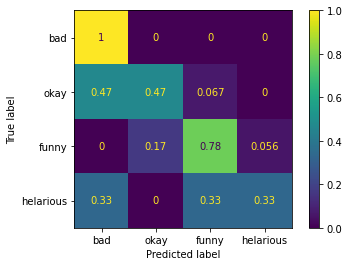

In [24]:
# normalized
cm = confusion_matrix(y_test, y_hat, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(["bad", "okay", "funny", "helarious"])).plot()

In [25]:
# Prepare result data for export by merging together input and estimated data
data_with_y_hat = X_test.copy()
data_with_y_hat["classification_estimate"] = y_hat
data_with_y_hat["classification"] = y_test
data_with_y_hat["name"] = test_set["name"]
data_with_y_hat["image"] = test_set["image"]

In [28]:
# Case examples
data_with_y_hat[data_with_y_hat["classification"] == 3]

,number_words,number_images,spelling_mistakes,reuse_potential,number_manager,number_reactions,number_viewed,heikelkeitsfaktor,laberfaktor,classification_estimate,classification,name,image
145,0,1,0,0,0,1,1,1.000000,1.000000,0,3,148.PNG,max
68,10,2,0,2,2,42,35,1.058807,0.200000,3,3,68.PNG,golfer
172,14,2,0,1,1,8,14,1.074041,0.142857,2,3,177.jpg,gandalf


In [27]:
data_with_y_hat[data_with_y_hat["image"].str.match("pheason")]

,number_words,number_images,spelling_mistakes,reuse_potential,number_manager,number_reactions,number_viewed,heikelkeitsfaktor,laberfaktor,classification_estimate,classification,name,image
